# CNN Sign Language Classifier

## Importing Libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
train_images = pd.read_csv('sign_mnist_train.csv')
test_images = pd.read_csv('sign_mnist_test.csv')
LEARN_RATE = 1.0e-4

<AxesSubplot:ylabel='count'>

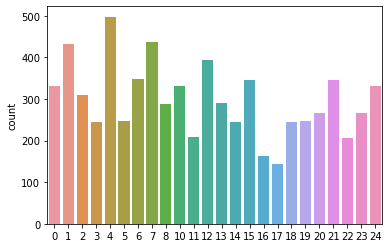

In [3]:
Y_train = train_images['label'].values
Y_test = test_images['label'].values

X_train = train_images.drop(["label"],axis=1).values
X_test = test_images.drop(["label"],axis=1).values

sns.countplot(x= Y_test)


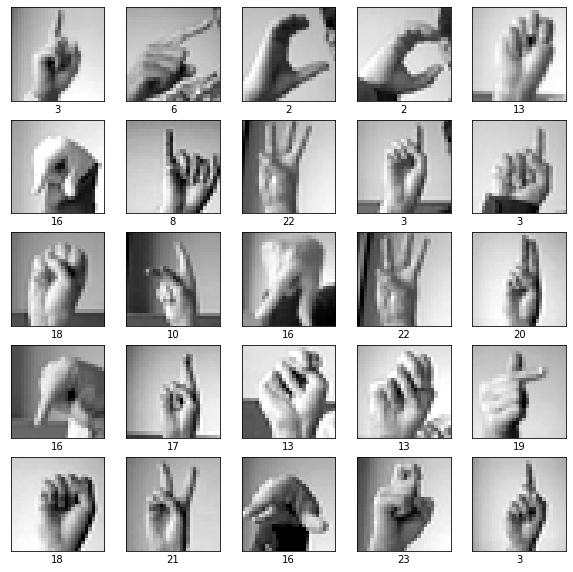

In [4]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.xlabel(Y_train[i])
plt.show()

## Reshaping, Normalisation and Encoding

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_train.shape

(27455, 28, 28, 1)

In [8]:
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)
Y_test = label_binrizer.fit_transform(Y_test)

## Image augmentation

In [9]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
train_datagen.fit(X_train)

## Model

In [10]:
model = Sequential()

model.add(Conv2D(filters= 32 , kernel_size=(3,3),padding = 'same', activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Dense(24, activation = 'softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer="Adam", # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model)
model2 = model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          1

In [12]:
#history = keras.models.load_model('/home/czars/Downloads/Deep Learning Project')
history = model.fit_generator(train_datagen.flow(X_train, Y_train, batch_size = 32),
                    steps_per_epoch = len(X_train) / 32, # number of samples per gradient update
                    epochs = 15, # number of iterations
                    validation_data= (X_test, Y_test),
                    verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
858/857 [==============================] - 15s 18ms/step - loss: 1.3045 - accuracy: 0.5920 - val_loss: 1.0361 - val_accuracy: 0.6634
Epoch 2/15
858/857 [==============================] - 15s 18ms/step - loss: 0.4131 - accuracy: 0.8623 - val_loss: 0.1986 - val_accuracy: 0.9325
Epoch 3/15
858/857 [==============================] - 15s 18ms/step - loss: 0.2323 - accuracy: 0.9239 - val_loss: 0.5267 - val_accuracy: 0.8240
Epoch 4/15
858/857 [==============================] - 15s 18ms/step - loss: 0.1672 - accuracy: 0.9443 - val_loss: 0.2248 - val_accuracy: 0.9303
Epoch 5/15
858/857 [==============================] - 15s 18ms/step - loss: 0.1334 - accuracy: 0.9557 - val_loss: 0.0646 - val_accuracy: 0.9794
Epoch 6/15
858/857 [==============================] - 15s 18ms/step - loss: 0.1185 - accuracy: 0.9604 - val_loss: 0.9641 - val_accuracy: 0.7539
Epoch 7/15
858/857 [==============================] - 15s 18

## Evaluate

In [13]:
model.evaluate(X_test, Y_test, verbose=0)

[0.07181960344314575, 0.9725320935249329]

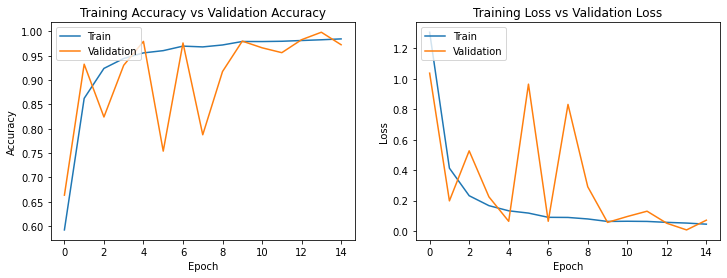

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [15]:
#model.save('/home/czars/Downloads/Deep Learning Project')


In [16]:
X_test = X_test.reshape(-1,28,28,1)

predictions = model.predict(X_test[:100])

print(model.evaluate(X_test[:100], Y_test[:100], verbose=0))
alphabet = "ABCDEFGHIKLMNOPQRSTUVWXY"

[0.16079191863536835, 0.9599999785423279]


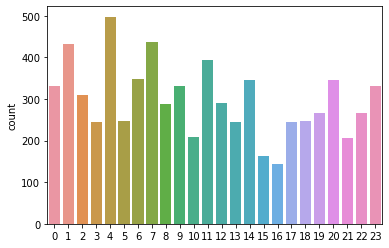

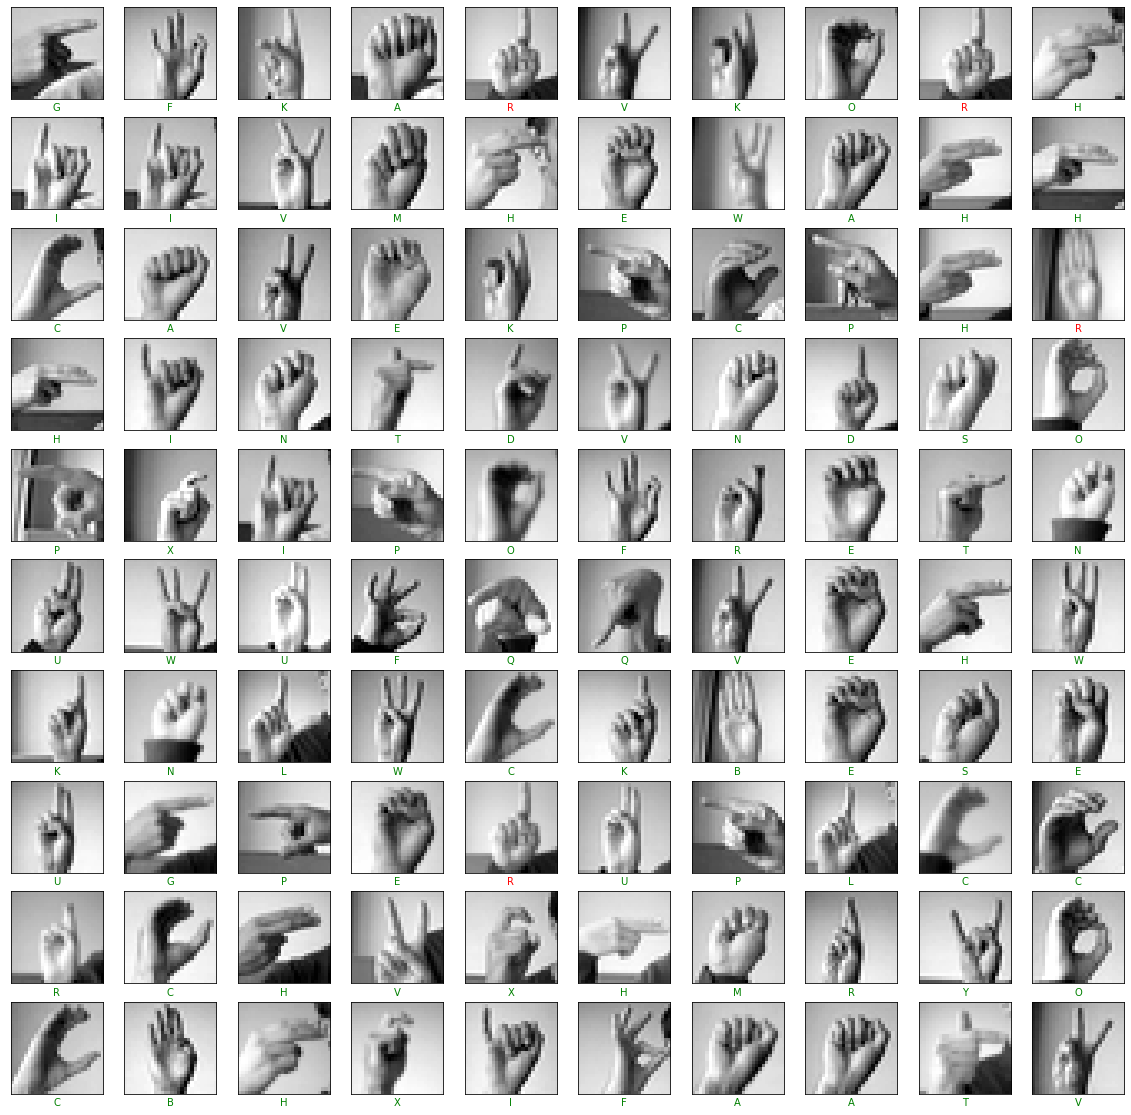

Correct = 96
Incorrect = 4


In [17]:


Y_test_inv = label_binrizer.inverse_transform(Y_test)
X_test = X_test.reshape(-1,28,28)
correct = 0
incorrect = 0

if type(Y_test_inv) != list:
    Y_test_inv = Y_test_inv.tolist()

for x in range(len(Y_test_inv)): 
    if Y_test_inv[x] > 8:
        Y_test_inv[x] = Y_test_inv[x] - 1


sns.countplot(x= Y_test_inv)
    
    
Y_test_inv_alpha = Y_test_inv
for i in range(len(Y_test_inv)):

    Y_test_inv_alpha[i] = alphabet[Y_test_inv[i]] 


plt.figure(figsize=(20,20))
for i in range(100):
    #a = 0
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    
   # if (i >= 9):
   #     a = 1
   
    if alphabet[np.argmax(predictions[i])] == Y_test_inv_alpha[i]:
        colour = 'green'
        correct = correct + 1 
    else:
        colour = 'red'
        incorrect = incorrect + 1
        
    plt.xlabel(alphabet[np.argmax(predictions[i])], color = colour)
    
plt.show()
print("Correct = " + str(correct))
print("Incorrect = " + str(incorrect))

In [18]:
model.save('/home/czars/Downloads/Deep Learning Project')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/czars/Downloads/Deep Learning Project\assets
